# 영문 워드 크라우드

In [1]:
# colab - 접속할때마다 다운 받아야함
# 주피터에서는 1번만 하면 사용가능
# NLTK(Natural Language ToolKit)
# nltk.download('punkt')
# nltk.download('stopwords')

ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pickle

# 1. stopwords(불용어)처리

In [3]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
# wordcloud 에서 제공하는 불용어
sw_wc = STOPWORDS
print(sw_wc)

{'below', 'get', 'ours', "why's", 'have', 'above', 'which', 'whom', 'not', 'between', 'can', "she'll", 'our', 'however', 'who', 'and', "you'd", 'into', 'those', 'himself', "weren't", 'your', 'their', 'so', "let's", "can't", 'having', 'would', "hasn't", "we'd", 'how', 'off', "aren't", "we're", 'his', 'to', "she'd", 'doing', 'there', "they'd", "you've", 'because', 'at', 'had', 'against', 'after', 'else', 'from', 'i', 'shall', 'during', "we've", 'therefore', 'herself', 'through', 'why', "hadn't", 'when', 'is', "shan't", 'was', 'them', 'any', 'too', 'again', 'over', 'com', 'for', 'her', 'nor', 'ever', "shouldn't", "you're", "i'd", 'what', 'does', "won't", 'are', 'before', 'by', 'further', 'hers', "they've", "couldn't", 'until', "where's", "he'll", 'both', 'with', 'a', 'like', 'ourselves', 'where', 'r', 'under', 'in', "wouldn't", 'am', "that's", 'on', 'theirs', "doesn't", 'also', 'could', 'ought', 'did', 'my', 'all', 'such', "when's", "isn't", "mustn't", "she's", "wasn't", 'they', "he'd", "

In [5]:
print(len(sw_nltk))
print(len(sw_wc))

179
192


# 2. 이상한 나라의 엘리스 분석

In [6]:
with open('./data1/Alice.txt') as file:
    text = file.read()

In [7]:
# 'said' 단어를 불용어 처리 추가
sw_wc.add('said')

In [21]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc)
wc = wc.generate(text)

In [23]:
count = 0
for key, value in wc.words_.items():
    print(key, ':', value)
    count += 1
    if count > 10:
        break

Alice : 1.0
little : 0.29508196721311475
one : 0.27595628415300544
know : 0.2459016393442623
went : 0.226775956284153
thing : 0.2185792349726776
time : 0.2103825136612022
Queen : 0.20765027322404372
see : 0.1830601092896175
King : 0.17486338797814208
well : 0.1721311475409836


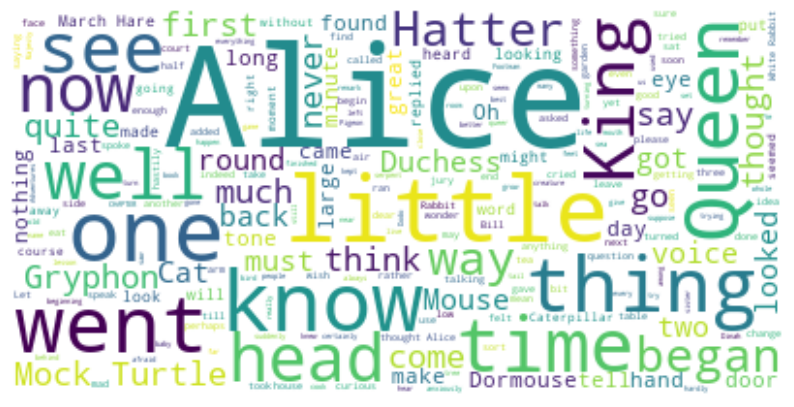

In [25]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
data_dict = {}
data_dict['A'] = [0, 1, 2]
data_dict['B'] = [3, 4, 5]
data_dict['C'] = [6, 7, 8]

In [32]:
data_dict

{'A': [0, 1, 2], 'B': [3, 4, 5], 'C': [6, 7, 8]}

In [34]:
with open ('data_dict.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

In [35]:
print(f)

<_io.BufferedWriter name='data_dict.pkl'>


# 그림 위에 표시하기

In [36]:
mask = np.array(Image.open('./data1/Alice_mask.png'))

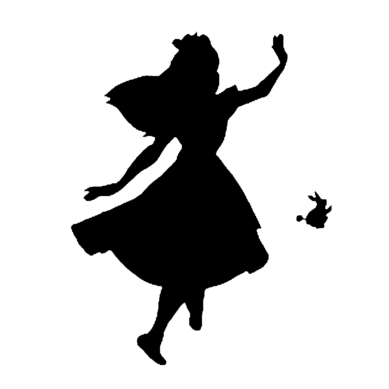

In [37]:
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
wc = WordCloud(background_color='white', max_words=2000,
               stopwords=sw_wc, mask=mask).generate(text)

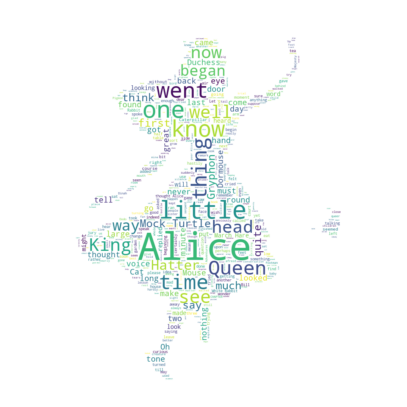

In [39]:
plt.figure(figsize=(5,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()